## Cancer Diagnosis Using Machine Learning algorithms such as Decision Tree, Bagging, AdaBoost, XGBoost, and Random Forest.

## Part I

In [1]:
import numpy as np
import pandas as pd

### Read the dataset file “Cancer.csv” 

In [2]:
df  = pd.read_csv("https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv")

### Displays the dataset we created above from the data gathered from our link

In [3]:
df

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1,0
146,9,7,7,5,5,10,7,8,3,1
147,10,8,8,4,10,10,8,1,1,1
148,1,1,1,1,2,1,3,1,1,0


### Grabbing our features.

In [4]:
X = df.loc[:, df.columns != 'Malignant_Cancer']
X

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
145,3,1,1,1,2,1,2,1,1
146,9,7,7,5,5,10,7,8,3
147,10,8,8,4,10,10,8,1,1
148,1,1,1,1,2,1,3,1,1


### Grabbing our label.

In [5]:
y = df['Malignant_Cancer']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    0
146    1
147    1
148    0
149    0
Name: Malignant_Cancer, Length: 150, dtype: int64

## Part II
### Importing our sklearn functions to split the dataset into testing and training sets.

In [6]:
from sklearn.model_selection import train_test_split

### Generating our training and testing sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2) 

## Part III

### Using Decision Tree Classifier, so we import it from the library and then declare my decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
my_DecisionTree = DecisionTreeClassifier(random_state=2)

### Training our decision tree classifier.

In [10]:
my_DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

### Testing our trained decision tree classifier with our testing set to see the predictions it gives.

In [11]:
y_predict = my_DecisionTree.predict(X_test)

### Comparing our actual resluts with our predicted results to see the accuracy.

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8666666666666667

### Calculating and reporting the AUC of our decision tree classifier.

In [13]:
y_predict = my_DecisionTree.predict(X_test)
y_predict_prob = my_DecisionTree.predict_proba(X_test) # y_predict_prob has (45,2) 2 is either 1 or 0 and that determines if they have cancer or not. 

from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1) # y_predict_prob[:,1] checks each row as it goes.
AUC = metrics.auc(fpr, tpr)
AUC

0.8697478991596639

## Part IV
### Bootstrap so we can then do Bagging. We import our resample library to generate a random bootstrap dataset for BOTH X_train and y_train. We declare decision tree classifier. We train our classifier. We test our classifier model with our testing set(X_test). We record the prediction. We fianlly add our predictions it to a list.

In [14]:
from sklearn.utils import resample

all_base_classifiers_predictions = []

for i in range(29):
    bootstarp_size = int(0.8*len(X_train)) #might be X
    X_bag, y_bag = resample(X_train, y_train, n_samples = bootstarp_size , random_state=i , replace = True) # try it with just X_train
    Base_DecisionTree = DecisionTreeClassifier(random_state=2)
    Base_DecisionTree.fit(X_bag, y_bag)
    Base_DecisionTree_prediction = Base_DecisionTree.predict(X_test)
    all_base_classifiers_predictions.append(Base_DecisionTree_prediction)

### We do voting here. We go through EACH array(29 rows in this case) and specifically look at one column per loop of all 29 arrays, or in other words we look at all elements positioned at "i" on the column in all 29 arrays(rows) . We take the most shown value for that column gathered from the 29 arrays and save it to an array. We will be left with one array with all the voted elements. We take this array and preform our accuracy score results.

In [15]:
import statistics
finalPrediction = []
bagging_proba_predict = []

for i in range(len(all_base_classifiers_predictions[i])):
    temp = [] # needed here to restart the temp array each loop
    count_ones = 0
    for j in range(len(all_base_classifiers_predictions)):
        temp.append(all_base_classifiers_predictions[j][i])
        if(all_base_classifiers_predictions[j][i] == 1):
            count_ones = count_ones + 1
    finalPrediction.append(statistics.mode(temp)) # gets the popular result 1 or 0 and adds it to our array
    bagging_proba_predict.append((count_ones / len(all_base_classifiers_predictions))) # in this case length should be 29. We do this to see the percentage of probability for each column in each testing sample.

finalVotingResultAcc = accuracy_score(finalPrediction, y_test)
finalVotingResultAcc

0.9111111111111111

### Calculating and reporting the AUC for bagging

In [16]:
fpr_bag, tpr_bag, thresholds = metrics.roc_curve(y_test, bagging_proba_predict, pos_label=1)
AUC_bag = metrics.auc(fpr_bag, tpr_bag)
AUC_bag

0.9380252100840336

## Part V
### Importing our Adaboost Library

In [17]:
from sklearn.ensemble  import AdaBoostClassifier

### Defining our Adaboost classifier

In [18]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

### Training our AdaBoost classifier

In [19]:
my_AdaBoost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=29, random_state=2)

### Testing our trained AdaBoost model/classifier and checking the accuracy.

In [20]:
y_AdaBoost_predict = my_AdaBoost.predict(X_test)
AdaBoost_accuracy = accuracy_score(y_test, y_AdaBoost_predict)
AdaBoost_accuracy

0.9555555555555556

### Calculating the AUC of our AdaBoost classifier.

In [21]:
y_predict_prob_AdaBoost = my_AdaBoost.predict_proba(X_test)

from sklearn import metrics
fpr_AdaBoost, tpr_AdaBoost, thresholds_AdaBoost = metrics.roc_curve(y_test, y_predict_prob_AdaBoost[:,1], pos_label=1)
AUC_AdaBoost = metrics.auc(fpr_AdaBoost, tpr_AdaBoost)
AUC_AdaBoost

0.9653361344537815

## Part VI
### In this section, we use another decision tree boosting technique called "gradient boosting" with its very popular and super efficient implementation “XGBoost” that stands for "Extreme Gradient Boosting." This algorithm is not included in sklearn, so you need to install the XGBoost library

In [22]:
from xgboost   import XGBClassifier

### Defining our classifier XGBoost

In [23]:
my_XGBoost = XGBClassifier(n_estimators = 29,random_state=2)

### Training our XGBoost classifier

In [24]:
my_XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=29, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2, ...)

### Testing our trained XGBoost model/classifier and checking the accuracy.

In [25]:
y_XGBoost_predict = my_XGBoost.predict(X_test)
XGBoost_accuracy = accuracy_score(y_test, y_XGBoost_predict)
XGBoost_accuracy

0.9555555555555556

### Calculating the AUC of our XGBoost classifier.

In [26]:
y_predict_prob_XGBoost = my_XGBoost.predict_proba(X_test)

fpr_XGBoost, tpr_XGBoost, thresholds_XGBoost = metrics.roc_curve(y_test, y_predict_prob_XGBoost[:,1], pos_label=1)
AUC_XGBoost = metrics.auc(fpr_XGBoost, tpr_XGBoost)
AUC_XGBoost

0.9716386554621849

## Part VII
### Here we use scikit-learn “Random Forest” classifier to predict Cancer based on the training/testing datasets

In [27]:
from sklearn.ensemble import RandomForestClassifier

### Declaring our Random Forest Classifier.

In [28]:
my_RandomForest = RandomForestClassifier(n_estimators = 29, bootstrap = True, random_state=2)

### Training our Random Forest Classifier.

In [29]:
my_RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=29, random_state=2)

### Testing our trained Random Forest model/classifier and checking the accuracy.

In [30]:
y_RandomForest_predict = my_RandomForest.predict(X_test)
RandomForest_accuracy = accuracy_score(y_test, y_RandomForest_predict)
RandomForest_accuracy

0.9555555555555556

### Calculating the AUC of our Random Forest classifier.

In [31]:
y_predict_prob_RandomForest = my_RandomForest.predict_proba(X_test)

fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = metrics.roc_curve(y_test, y_predict_prob_RandomForest[:,1], pos_label=1)
AUC_RandomForest = metrics.auc(fpr_RandomForest, tpr_RandomForest)
AUC_RandomForest

0.9516806722689075

## VIII
### Plotting ROC curves of our algorithms models: Decision Tree, Bagging, AdaBoost, XGBoost, and Random Forest.

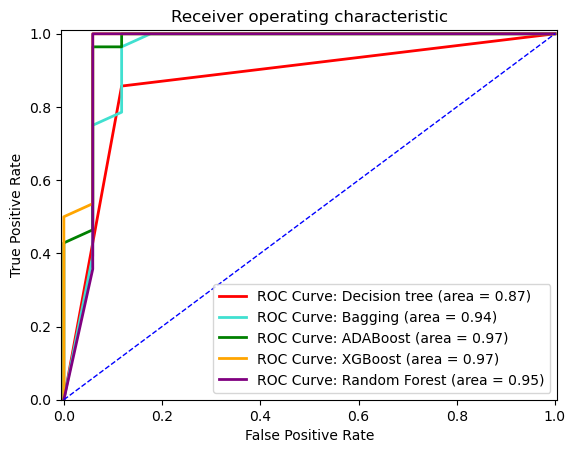

In [32]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve: Decision tree (area = %0.2f)' % AUC)
# Bagging
plt.plot(fpr_bag, tpr_bag, color='turquoise', lw=2, 
         label='ROC Curve: Bagging (area = %0.2f)' % AUC_bag)
#ADABoost
plt.plot(fpr_AdaBoost, tpr_AdaBoost, color='green', lw=2, 
         label='ROC Curve: ADABoost (area = %0.2f)' % AUC_AdaBoost)
#XGBoost
plt.plot(fpr_XGBoost, tpr_XGBoost, color='orange', lw=2, 
         label='ROC Curve: XGBoost (area = %0.2f)' % AUC_XGBoost)
#Random Forest
plt.plot(fpr_RandomForest, tpr_RandomForest, color='purple', lw=2, 
         label='ROC Curve: Random Forest (area = %0.2f)' % AUC_RandomForest)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

### Answer to Question 1: It is between ADABoost and XGBoost but I would say the XGBoost AUC.

### Answer to Question 2: Random Forest, XGBoost, and ADABoost all get the same accuracy of 95%

### If we want a false positive rate of %7 then that would be the Decision Tree classifier.